In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

# checking clusters

## Reading data

In [2]:
directory = "cleaned_trending_topic\\"
data = pd.read_csv(directory + 'cleaned_topic_1.csv')

## Log transformation

In [3]:
data['retweets'] = np.log1p(data["retweets"])
data['favorites'] = np.log1p(data["favorites"])

## Checking for optimal k value

## Elbow method

In [4]:
K = range(1,10)
ssd = []

for k in K:
    km = KMeans(n_clusters = k,init = 'k-means++')
    km = km.fit(data[['retweets','favorites']])
    ssd.append(km.inertia_)

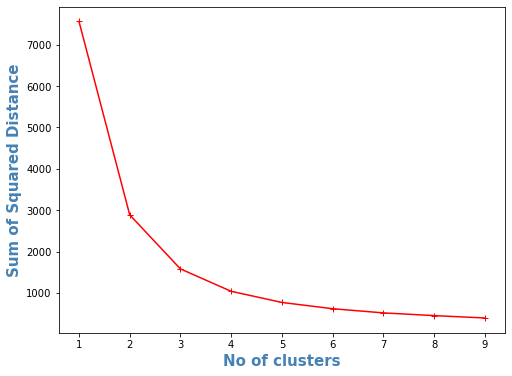

In [5]:
folder = "figures\\"
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(K,ssd, marker = '+', color = 'red')
plt.xlabel('No of clusters', size = 15, color = 'steelblue', fontweight = 'bold')
plt.ylabel('Sum of Squared Distance', size = 15,color = 'steelblue', fontweight = 'bold')
plt.savefig(folder+"elbow.png")
plt.show()

# Creating Clusters for all file

In [6]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

In [7]:
directory = "cleaned_trending_topic\\"
#reading all the csv file from the directory
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            print()
            print("-----------------------------------------")
            print()
            print("File no:", file)
            print()
            filename = directory + file
            #Reading the csv file
            data = pd.read_csv(filename)
            data1 = data.copy()
            data1['retweets'] = np.log1p(data["retweets"])
            data1['favorites'] = np.log1p(data["favorites"])
            
            kmeans = KMeans(n_clusters = 2,  init = 'k-means++')
            kmeans = kmeans.fit(data1[['retweets','favorites']])
            data['vtarget'] = kmeans.labels_
            
            x = data[data['vtarget'] == 0]
            y = data[data['vtarget'] == 1]
            
            cluster_1_avg =  np.mean(x['retweets'])
            cluster_2_avg =  np.mean(y['retweets'])
            
            if cluster_1_avg > cluster_2_avg:
                data['target'] = np.where(data["vtarget"] == 0,1,0)
            else:
                data['target'] = data["vtarget"]
            
            data = data.drop(['vtarget'], axis = 1)
            
            filename = "labeled_data//" + file
            data.to_csv(filename,index = False)


-----------------------------------------

File no: cleaned_topic_1.csv


-----------------------------------------

File no: cleaned_topic_10.csv


-----------------------------------------

File no: cleaned_topic_100.csv


-----------------------------------------

File no: cleaned_topic_11.csv


-----------------------------------------

File no: cleaned_topic_12.csv


-----------------------------------------

File no: cleaned_topic_13.csv


-----------------------------------------

File no: cleaned_topic_14.csv


-----------------------------------------

File no: cleaned_topic_15.csv


-----------------------------------------

File no: cleaned_topic_16.csv


-----------------------------------------

File no: cleaned_topic_17.csv


-----------------------------------------

File no: cleaned_topic_18.csv


-----------------------------------------

File no: cleaned_topic_19.csv


-----------------------------------------

File no: cleaned_topic_2.csv


-------------------------